In [2]:
from tbparse import SummaryReader
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
def parse_data(log_dir):
    trials =os.listdir(log_dir)
    trials = sorted(trials,key=lambda x:int(x.split("_")[1]))

    trail_data = {}
    for i,trial in enumerate(trials):
        reader = SummaryReader(os.path.join(log_dir,trial))
        df = reader.scalars
        tags = np.unique(df["tag"])

        trail_data[i] = { tag:df[df["tag"]==tag]["value"].values  for tag in tags}
    return trail_data

In [4]:
custom_path ="results/lightning_logs_custom"
DLV3_path ="results/lightning_logs_DLV3"
unet_path ="results/lightning_logs_unet"

In [5]:
data_custom = parse_data(custom_path)
data_DLV3 = parse_data(DLV3_path)
data_unet = parse_data(unet_path)

In [6]:
data_custom[0].keys()

dict_keys(['Test Acc_epoch', 'Test Acc_step', 'Test Loss_epoch', 'Test Loss_step', 'Test dice_coef_epoch', 'Test dice_coef_step', 'Test mIoU_epoch', 'Test mIoU_step', 'Train Acc_epoch', 'Train Acc_step', 'Train Loss_epoch', 'Train Loss_step', 'Train dice_coef_epoch', 'Train dice_coef_step', 'Train mIoU_epoch', 'Train mIoU_step', 'Validation Acc_epoch', 'Validation Acc_step', 'Validation Loss_epoch', 'Validation Loss_step', 'Validation dice_coef_epoch', 'Validation dice_coef_step', 'Validation mIoU_epoch', 'Validation mIoU_step', 'epoch', 'hp_metric'])

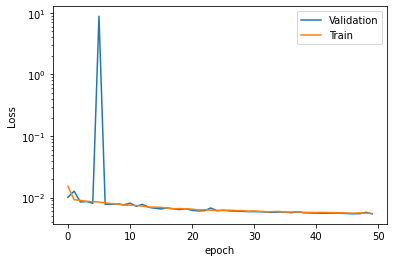

In [7]:
x = np.arange(50)
plt.plot(x,data_DLV3[5]["Validation Loss_epoch"],label= "Validation")
plt.plot(x,data_DLV3[5]["Train Loss_epoch"],label = "Train")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.yscale("log")

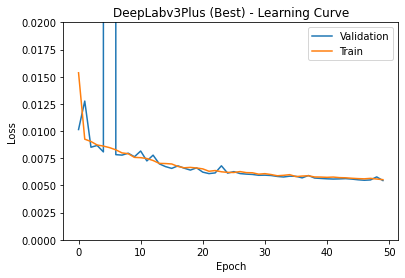

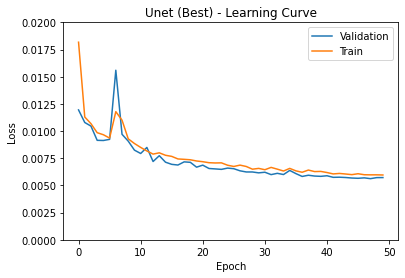

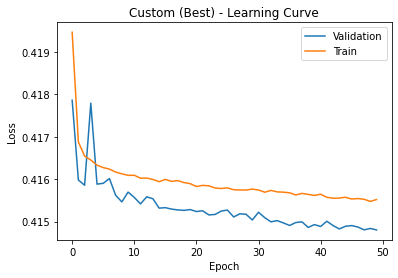

In [8]:
#Plot learning curves for all models

import matplotlib.ticker as mticker

best_model_versions = [ ('DeepLabv3Plus (Best) - Learning Curve',data_DLV3[5]),
                        ('Unet (Best) - Learning Curve', data_unet[2]),
                        ('Custom (Best) - Learning Curve',data_custom[28]),
                      ]
x = np.arange(50)

for model_version in best_model_versions:
    title, model = model_version
    plt.plot(x,model["Validation Loss_epoch"],label= "Validation")
    plt.plot(x,model["Train Loss_epoch"],label = "Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc = "best")
    #plt.yscale("log")
    
    plt.title(title)
    if "Custom" not in title:
        plt.ylim(0,.02)
            
    plt.savefig(f"figures/{title}",facecolor='white', bbox_inches='tight') 
    plt.show()
	
    

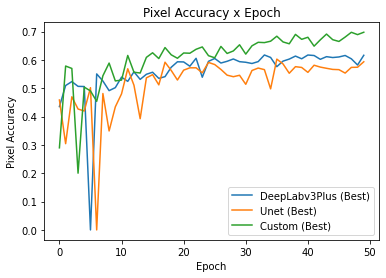

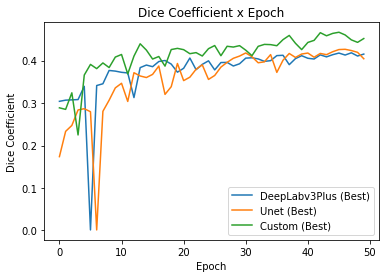

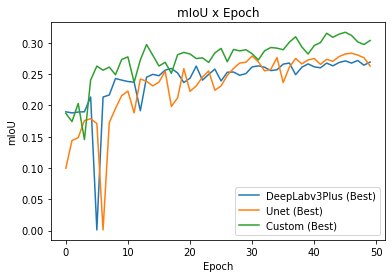

In [28]:

#Plot pixel acc, mIou, dice curves for all models
 
 

best_model_versions = [ ('DeepLabv3Plus (Best)',data_DLV3[5]),
                        ('Unet (Best)', data_unet[2]),
                        ('Custom (Best)',data_custom[28]),
                      ]
validations = ['Validation Acc_epoch',  'Validation dice_coef_epoch', 'Validation mIoU_epoch']
labels = ['Pixel Accuracy', 'Dice Coefficient', 'mIoU']

x = np.arange(50)

min_=10000.0
 
for validation, label in zip(validations,labels):
    for model_version in best_model_versions:
        name, model = model_version
        plt.plot(x,model[validation],label= name) 
        cur_min = min(model[validation])
        if min_>(cur_min):
            min_= cur_min
         
    #plt.ylim(bottom=min_)    
    plt.xlabel("Epoch")
    plt.ylabel(label)
    plt.legend(loc = "best")    
    title = "{} x Epoch".format(label)
    plt.title(title)
    ax = plt.gca()
    plt.savefig(f"figures/{title}",facecolor='white',bbox_inches='tight')
     

    plt.show()

In [9]:
custom_max = np.vstack([  data_custom[key]['Test mIoU_epoch'] for key in data_custom.keys()]).argmax()
DLV3_max = np.vstack([  data_DLV3[key]['Test mIoU_epoch'] for key in data_DLV3.keys()]).argmax()
unet_max = np.vstack([  data_unet[key]['Test mIoU_epoch'] for key in data_unet.keys()]).argmax()

In [10]:
print(np.vstack([  data_custom[key]['Test mIoU_epoch'] for key in data_custom.keys()]).max())
print(np.vstack([  data_DLV3[key]['Test mIoU_epoch'] for key in data_DLV3.keys()]).max())
print(np.vstack([  data_unet[key]['Test mIoU_epoch'] for key in data_unet.keys()]).max())

0.3893795609474182
0.25354263186454773
0.28153207898139954


In [11]:
custom_max #Focal Adam ExpLR Flair

2

In [12]:
DLV3_max #Focal RMSProp ExpLR Flair

5

In [13]:
unet_max #Focal Adam ExpLR t2

1

In [14]:
data_custom[0].keys()

dict_keys(['Test Acc_epoch', 'Test Acc_step', 'Test Loss_epoch', 'Test Loss_step', 'Test dice_coef_epoch', 'Test dice_coef_step', 'Test mIoU_epoch', 'Test mIoU_step', 'Train Acc_epoch', 'Train Acc_step', 'Train Loss_epoch', 'Train Loss_step', 'Train dice_coef_epoch', 'Train dice_coef_step', 'Train mIoU_epoch', 'Train mIoU_step', 'Validation Acc_epoch', 'Validation Acc_step', 'Validation Loss_epoch', 'Validation Loss_step', 'Validation dice_coef_epoch', 'Validation dice_coef_step', 'Validation mIoU_epoch', 'Validation mIoU_step', 'epoch', 'hp_metric'])

In [15]:
custom_max = np.vstack([  data_custom[key]['Test dice_coef_epoch'] for key in data_custom.keys()]).argmax()
DLV3_max = np.vstack([  data_DLV3[key]['Test dice_coef_epoch'] for key in data_DLV3.keys()]).argmax()
unet_max = np.vstack([  data_unet[key]['Test dice_coef_epoch'] for key in data_unet.keys()]).argmax()

In [16]:
print(np.vstack([  data_custom[key]['Test dice_coef_epoch'] for key in data_custom.keys()]).max())
print(np.vstack([  data_DLV3[key]['Test dice_coef_epoch'] for key in data_DLV3.keys()]).max())
print(np.vstack([  data_unet[key]['Test dice_coef_epoch'] for key in data_unet.keys()]).max())

0.5463778376579285
0.39441612362861633
0.4232841730117798


In [17]:
DLV3_max #Focal RMSProp ExpLR Flair

5

In [18]:
unet_max #Focal Adam ExpLR t2

1

In [19]:
custom_max #Focal Adam ExpLR Flair

2

In [20]:
DLV3_max #Focal RMSProp ExpLR Flair

5

In [21]:
unet_max #Focal Adam ExpLR t2

1

In [22]:
custom_max #Focal Adam ExpLR Flair

2

In [23]:
custom_max = np.vstack([  data_custom[key]['Test Acc_epoch'] for key in data_custom.keys()]).argmax()
DLV3_max = np.vstack([  data_DLV3[key]['Test Acc_epoch'] for key in data_DLV3.keys()]).argmax()
unet_max = np.vstack([  data_unet[key]['Test Acc_epoch'] for key in data_unet.keys()]).argmax()

In [24]:
print(np.vstack([  data_custom[key]['Test Acc_epoch'] for key in data_custom.keys()]).max())
print(np.vstack([  data_DLV3[key]['Test Acc_epoch'] for key in data_DLV3.keys()]).max())
print(np.vstack([  data_unet[key]['Test Acc_epoch'] for key in data_unet.keys()]).max())

0.6720225214958191
0.5839999318122864
0.5707069635391235


In [25]:
DLV3_max #Focal RMSProp ExpLR Flair

5

In [26]:
unet_max #Focal Adam ExpLR t2 - >  Flair

2

In [27]:
custom_max #Focal Adam ExpLR Flair - > logcosh t2

28